<!DOCTYPE html>

<html>

<head>

<title>Magos da Furadeira</title>

</head>

<body>

<div style="display: flex; align-items: center;">

<img src="https://i.ibb.co/z490FF5/FUNDO-REMOVIDO.png" alt="FUNDO REMOVIDO">

<p style="margin-left: 40px; font-size: 24px; font-weight: bold; border-bottom: 1px solid black;">José David e Gabriel Torquarto - <br> Magos da Furadeira Bosch de Impacto </p>

</div>

</body>

</html>

 

### Ahhh!!! Meus vizinhos não me deixam em paz!
**ID:** Modelos 02

**Proponente:** Patrulheira Formidável Vermelha (sempre existem 5 Patrulheiros Formidáveis no reino de Lumi, se um deles sai do cargo é feita uma seleção para preencher a vaga. Suas vestimentas são todas monocromáticas.)

**Objetivo:** Escolha um conjunto de dados com pelo menos 3 atributos numéricos e 1 target numérico. Teste o que acontece com a sua previsão quando você varia o número de vizinhos do modelo K-NN nestes dados. Discuta seus resultados.

**Pontuação máxima:** 10 pontos se não mostrar nenhum gráfico ou 15 pontos se mostrar gráficos que ilustrem a sua resposta

A princípio, as bibliotecas Seaborn, Numpy, Statistics e Matplotlib são importadas para, respectivamente, importar o dataset, realizar cálculos necessários nas funções do modelo k-NN, realizar o cálculo de média e possibilitar a plotagens dos gráficos.

In [34]:
import seaborn as sbn
import numpy as np
import statistics as st
import matplotlib.pylab as plt

Definimos o dataframe df como sendo o corregamento do dataset de flores iris da biblioteca seaborn. Esse dataset foi um dos explorados por nossa dupla na atividade Dados 1.<sup>[1]</sup> 

In [35]:
df = sbn.load_dataset('iris')
display(df)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<p align ='justify'>De forma geral, esse dataset possui informações das métricas de três diferentes espécies de iris. Para a realização da atividade, as métricas de largura da sépala, comprimento da sépala e largura da pétala foram utilizados como atributos, totalizando os 3 atributos numéricos minímos requeridos. O target número é o comprimento da pétala.<br>
A princípio, todo processo de correção de dataframe e conversão para array numpy é feito, assim como é ensinado no material 3.1.<sup>[2]</sup></p>

In [36]:
atributos = ['sepal_length', 'sepal_width', 'petal_length']
target = ['petal_width']

df = df.reindex(atributos + target, axis=1)
df = df.dropna()

X = df.reindex(atributos, axis=1)
y = df.reindex(target, axis=1)

X = X.values
y = y.values.ravel()

Para executar o processo de previsão, as funções de treino e previsão K-NN são definidas conforme o apresentado no material 3.1 e o estado na referência 3.<sup>[2][3]</sup>

In [37]:
def treino_knn(modelo, x, y):
  
    modelo["x"] = x
    modelo["y"] = y

def previsao_knn(modelo, x):

    diferenca = modelo["x"] - x
    dife_quadrado = diferenca**2
    somatoria = np.sum(dife_quadrado, axis=1)
    distancias = somatoria ** (1/2)
    ordenamento = np.argsort(distancias)
    vizinhos_mais_proximos = ordenamento[:modelo["numero_de_vizinhos"]]
    targets_vizinhos = modelo["y"][vizinhos_mais_proximos]
    previsao = st.mean(targets_vizinhos)
    return previsao

Para gerar os valores que usaremos nas plotagens de alguns gráficos, crio uma lista para armanezar a quantidade de vizinhos testada e uma lista de 4 listas para armanezar testes com diferentes valores para o argumento x. Fazendo uso de um loop for para cada i em um range de 1 até o valor de linhas presentes na dataframe, a cada loop os valores previstos em diferentes x's e o valor de i são adicionados em diferentes listas. 

In [38]:
n_vizinhos =[]
previsoes = [
    [],
    [],
    [],
    [],
]

for i in range(1,len(df['petal_length'])):
    modelo = {"numero_de_vizinhos": i}
    treino_knn(modelo, X, y)
    previsoes[0].append(previsao_knn(modelo,[5,3,2]))
    previsoes[1].append(previsao_knn(modelo,[4,4,4]))
    previsoes[2].append(previsao_knn(modelo,[2,3.5,3]))
    previsoes[3].append(previsao_knn(modelo,[4,3,4.5]))
    n_vizinhos.append(i)


Para realizar a plotagem dos gráficos e analisar o comportamento do valor previto em função do aumento do número de vizinhos, fazemos uso de uma série de funções do Matplotlib para plotagem de gráficos em subplots.<sup>[4][5]</sup>

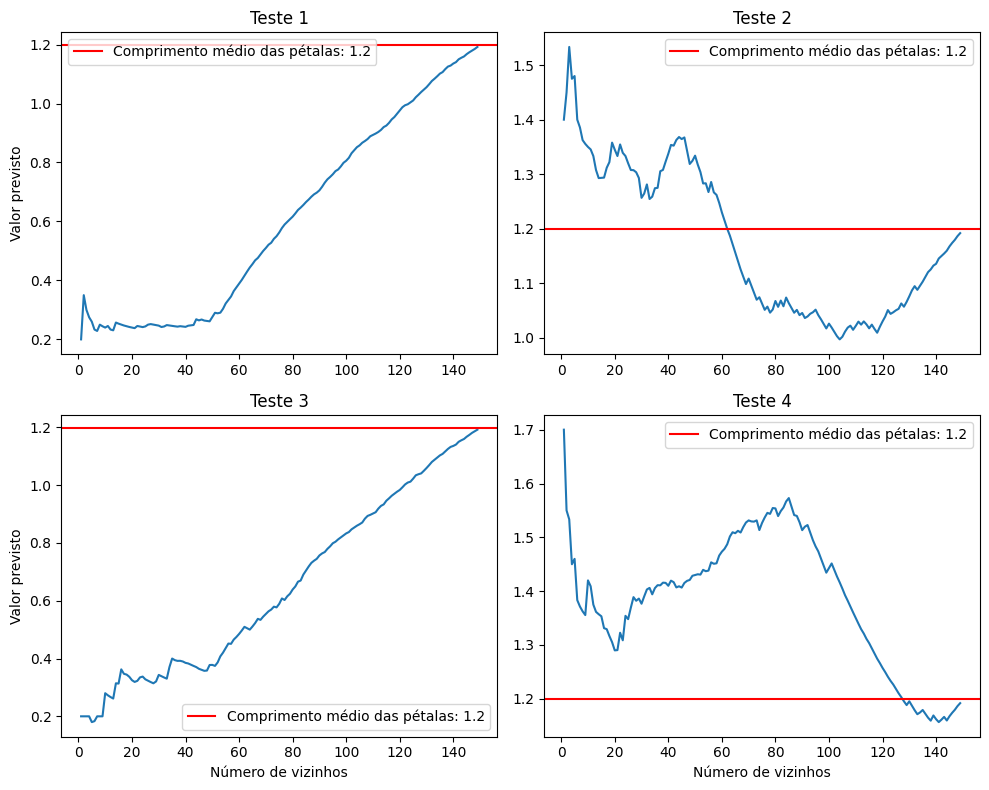

In [39]:
ue = df['petal_width'].tolist()
media = st.mean(ue)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].plot(n_vizinhos, previsoes[0])
axs[0, 0].set_ylabel('Valor previsto')
axs[0, 0].axhline(media, color='red', label=f'Comprimento médio das pétalas: {round(media, 2)}')
axs[0, 0].set_title('Teste 1')
axs[0, 0].legend()

axs[0, 1].plot(n_vizinhos, previsoes[1])
axs[0, 1].axhline(media, color='red', label=f'Comprimento médio das pétalas: {round(media, 2)}')
axs[0, 1].set_title('Teste 2')
axs[0, 1].legend()

axs[1, 0].plot(n_vizinhos, previsoes[2])
axs[1, 0].set_xlabel('Número de vizinhos')
axs[1, 0].set_ylabel('Valor previsto')
axs[1, 0].axhline(media, color='red', label=f'Comprimento médio das pétalas: {round(media, 2)}')
axs[1, 0].set_title('Teste 3')
axs[1, 0].legend()

axs[1, 1].plot(n_vizinhos, previsoes[3])
axs[1, 1].set_xlabel('Número de vizinhos')
axs[1, 1].axhline(media, color='red', label=f'Comprimento médio das pétalas: {round(media, 2)}')
axs[1, 1].set_title('Teste 4')
axs[1, 1].legend()

plt.tight_layout()

plt.show()

<p align = 'justify'>Observando os 4 testes feitos, é notável que quanto maior o número de vizinhos, mais a previsão se aproxima do valor médio do conjunto target, pois a função que realiza a previsão faz uso do cálculo de média dos valores dos k vizinhos mais próximos. Essa aproximação vai, aparentemente, ocorrendo linearmente quando o número de vizinhos fica relativamente próximo do total de vizinhos. Relativamente, pois para os testes 2 e 4, como as primeiras previsões são de valores acima da média, há primeiro um decréscimo para que depois haja essa aproximação de forma linear. Então, essa aproximação de forma linear pode ocorrer a partir de número próximo ou distante do número maíxmo de vizinhos. <br>
Quando o número de vizinhos se torna o valor máximo, o modelo K-NN, para um target númerico, se torna um cálculo da média do conjunto target. 

$$
\lim_{{k \to k_{\text{max}}}} Previsão = µ
$$
</p>

### Referências:

[1] JOSEDAVID23038. Aprendizado-de-M-quina/Tarefas/Dados 1 at main · joseDavid23038/Aprendizado-de-M-quina. Disponível em: <https://github.com/joseDavid23038/Aprendizado-de-M-quina/tree/main/Tarefas/Dados%201>. Acesso em: 17 set. 2023.

‌[2] Daniel R. Cassar. 3.1- k vizinhos mais próximos. 

‌[3] KNN without scikit learn. Disponível em: <https://www.kaggle.com/code/lohitha17/knn-without-scikit-learn>. Acesso em: 17 set. 2023.

‌[4] Creating multiple subplots using plt.subplots — Matplotlib 3.4.1 documentation. Disponível em: <https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html>. Acesso em: 17 set. 2023.

‌[5] Examples — Matplotlib 3.5.1 documentation. Disponível em: <https://matplotlib.org/stable/gallery/index>. Acesso em: 17 set. 2023.

‌